In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
train = pd.read_csv("train.csv",index_col="PassengerId")
test = pd.read_csv("test.csv",index_col="PassengerId")

In [3]:
df = pd.concat([train, test])
# concat train and test data to one dataframe

In [4]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [6]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [7]:
df.describe(include=["O"])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


- Some of the age data, 2 embarked data and also most of the cabin data is missing.

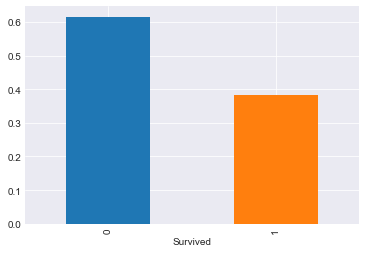

In [8]:
((train.groupby("Survived").count()/train["Survived"].count())["Name"]).plot(kind="bar")

In [9]:
train.groupby("Sex")["Survived"].value_counts(normalize=True).rename("percentage")

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: percentage, dtype: float64

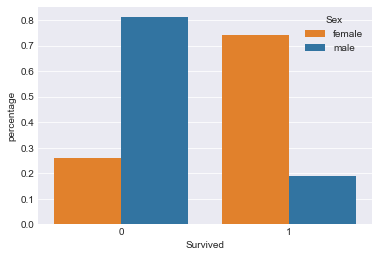

In [10]:
prop_df = (train.groupby("Sex")["Survived"].value_counts(normalize=True).rename("percentage").reset_index())
sns.barplot(y="percentage", x="Survived", hue="Sex", data=prop_df, palette=sns.color_palette(["tab:orange","tab:blue"]));

- %60 of the population did not survived.
- %80 of the not survived population is male

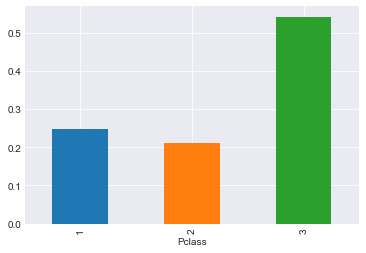

In [11]:
((df.groupby("Pclass").count()/df["Pclass"].count())["Name"]).plot(kind="bar")

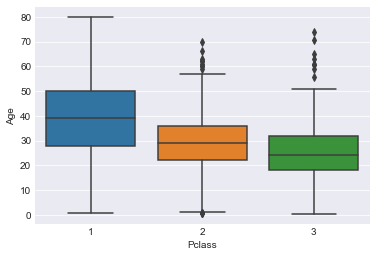

In [12]:
sns.boxplot("Pclass", "Age", data=df)

- More than %50 of the population is lower class
- Average age is higher for higher class

In [13]:
df["Title"] = df["Name"].str.extract(r'([a-zA-Z]+\.+)')

C:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [14]:
df["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [15]:
df.Title.value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Mlle.          2
Ms.            2
Major.         2
Mme.           1
Jonkheer.      1
Sir.           1
Don.           1
Dona.          1
Capt.          1
Countess.      1
Lady.          1
Name: Title, dtype: int64

In [16]:
df["IsNoble"] = df["Title"].apply(lambda x:0 if x in ["Mr.","Miss.","Mrs.","Ms."] else 1)

In [17]:
df.IsNoble.value_counts()

0    1216
1      93
Name: IsNoble, dtype: int64

In [18]:
df["Ticket"].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [19]:
def ticket_pre(tic):
    tic_list = tic.split()
    if len(tic_list) != 2:
        return "Unknown"
    else:
        return "".join(tic_list[:-1:])
def ticket_num(tic):
    tic_list = tic.split()
    if len(tic_list) == 1:
        return  tic_list[0]
    else:
        return tic_list[-1]

In [20]:
df["TicketPre"] = df["Ticket"].apply(ticket_pre)
df["TicketNum"] = df["Ticket"].apply(ticket_num)


In [21]:
df["TicketPre"].unique()

array(['A/5', 'PC', 'STON/O2.', 'Unknown', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON', 'SC/A.3', 'STON/OQ.', 'SC/A4', 'AQ/4', 'LP', 'AQ/3.'],
      dtype=object)

In [22]:
df["TicketNum"].value_counts()[:10]

2343       11
1601        8
2144        8
14879       7
3101295     7
17608       7
347077      7
347082      7
382652      6
113781      6
Name: TicketNum, dtype: int64

In [23]:
df[df["Ticket"].str.contains("2343")]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,IsNoble,TicketPre,TicketNum
PassengerId,,,,,,,,,,,,,,,
160,NaN,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0.0,CA. 2343,Master.,1,CA.,2343
181,NaN,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0.0,CA. 2343,Miss.,0,CA.,2343
202,NaN,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0.0,CA. 2343,Mr.,0,CA.,2343
325,NaN,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0.0,CA. 2343,Mr.,0,CA.,2343
464,48.0,NaN,S,13.00,"Milling, Mr. Jacob Christian",0,2,male,0,0.0,234360,Mr.,0,Unknown,234360
793,NaN,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0.0,CA. 2343,Miss.,0,CA.,2343
847,NaN,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0.0,CA. 2343,Mr.,0,CA.,2343
864,NaN,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0.0,CA. 2343,Miss.,0,CA.,2343
1080,NaN,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,NaN,CA. 2343,Miss.,0,CA.,2343


In [24]:
df["IsAlone"] = df[["Parch","SibSp"]].apply(lambda x: 1 if x.sum() > 0 else 0,axis=1)

In [25]:
df["TotalFamily"] = df["Parch"]+df["SibSp"]

In [26]:
df["TotalFamily"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: TotalFamily, dtype: int64

In [27]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,IsNoble,TicketPre,TicketNum,IsAlone,TotalFamily
PassengerId,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr.,0,A/5,21171,1,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs.,0,PC,17599,1,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss.,0,STON/O2.,3101282,0,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs.,0,Unknown,113803,1,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr.,0,Unknown,373450,0,0


In [28]:
df["CabinKnown"] = df["Cabin"].apply(lambda x: 1 if x==x else 0)

In [29]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).drop("Survived")

Cabin          0.774637
Age            0.200917
Embarked       0.001528
Fare           0.000764
Sex            0.000000
Name           0.000000
Parch          0.000000
Pclass         0.000000
CabinKnown     0.000000
TotalFamily    0.000000
Ticket         0.000000
Title          0.000000
IsNoble        0.000000
TicketPre      0.000000
TicketNum      0.000000
IsAlone        0.000000
SibSp          0.000000
dtype: float64

- %77 of the cabin data is missing
- %20 of the age data is missing
- Small percentage of the embarked and fare data are missing

In [30]:
age_mean = df.groupby(["TotalFamily","Pclass"])["Age"].mean().to_dict()
age_mean

{(0, 1): 40.48828125,
 (0, 2): 32.21830985915493,
 (0, 3): 27.6078125,
 (1, 1): 38.20618556701031,
 (1, 2): 31.740384615384617,
 (1, 3): 24.30263157894737,
 (2, 1): 42.87179487179487,
 (2, 2): 21.70733333333333,
 (2, 3): 19.534666666666666,
 (3, 1): 20.213333333333335,
 (3, 2): 21.046,
 (3, 3): 15.466999999999999,
 (4, 1): 32.2,
 (4, 2): 54.0,
 (4, 3): 17.181818181818183,
 (5, 1): 36.333333333333336,
 (5, 2): 24.0,
 (5, 3): 14.5,
 (6, 3): 17.375,
 (7, 3): 18.0,
 (10, 3): 14.5}

In [31]:
#age_mean = df.groupby("Pclass").mean()["Age"].to_dict()

In [32]:
def age_fill(data):
    data = data.tolist()
    return age_mean[data[0],data[1]]

In [33]:
df.loc[df["Age"].isnull(),"Age"] = df.loc[df["Age"].isnull()][["TotalFamily", "Pclass"]].apply(age_fill,axis=1)

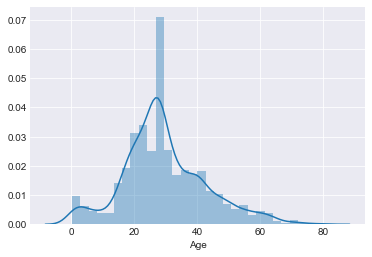

In [34]:
sns.distplot(df["Age"])

In [35]:
#categorize age young,adult,old
def ctg_age(age):
    if age <= 18:
        return "Young"
    elif 18 < age <= 35:
        return "Adult"
    else:
        return "Old"
df["AgeCtg"] = df["Age"].apply(ctg_age)

In [36]:
share_ticket = df["Ticket"].value_counts()[df["Ticket"].value_counts()> 1].index.tolist()

In [37]:
from statistics import mode

In [38]:
for ticket in share_ticket:
    for each in df[(df["Ticket"] == ticket) & (df["TotalFamily"] > 0)]["TotalFamily"].unique():
        each_family = df[df["Ticket"] == ticket].where(df["TotalFamily"] == each)
        each_family = each_family[~each_family["Ticket"].isnull()]
        if not each_family.dropna().empty and any(each_family["Cabin"].isnull()):
            each_family["Cabin"].fillna(mode(each_family["Cabin"].dropna()), inplace =True)
            df.loc[each_family.index,"Cabin"] = each_family["Cabin"]

In [39]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).drop("Survived")

Cabin          0.771581
Embarked       0.001528
Fare           0.000764
SibSp          0.000000
Name           0.000000
Parch          0.000000
Pclass         0.000000
Sex            0.000000
AgeCtg         0.000000
CabinKnown     0.000000
Ticket         0.000000
Title          0.000000
IsNoble        0.000000
TicketPre      0.000000
TicketNum      0.000000
IsAlone        0.000000
TotalFamily    0.000000
Age            0.000000
dtype: float64

- I filled some of the cabin data according to same ticket number.But it is not enough so i will fill rest of it according to Fare

In [40]:
df["Deck"] = df["Cabin"].apply(lambda x: x[0] if x == x else np.NaN)

In [41]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,IsNoble,TicketPre,TicketNum,IsAlone,TotalFamily,CabinKnown,AgeCtg,Deck
PassengerId,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr.,0,A/5,21171,1,1,0,Adult,NaN
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs.,0,PC,17599,1,1,1,Old,C
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss.,0,STON/O2.,3101282,0,0,0,Adult,NaN
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs.,0,Unknown,113803,1,1,1,Adult,C
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr.,0,Unknown,373450,0,0,0,Adult,NaN


In [42]:
df.loc[df["Deck"] == "T","Deck"] = np.NaN
# 1 cabin data is T but i couldnt find any deck named T so i think it is misslabeled

In [43]:
fare_mean = df.groupby("Deck").mean()["Fare"].to_dict()
fare_mean

{'A': 41.24431363636364,
 'B': 122.38307846153847,
 'C': 109.11285,
 'D': 53.00733913043479,
 'E': 54.564634146341454,
 'F': 18.451447826086955,
 'G': 14.205000000000002}

In [44]:
def distance(x, y):
    return (x-y)**2
def fill_cabin(data):
    fare = data
    min_dist = float("inf")
    deck = ""
    for cur_deck,mean_fare in fare_mean.items():
        dist = distance(fare, mean_fare)
        if min_dist > dist:
            min_dist = dist
            deck = cur_deck
    return deck

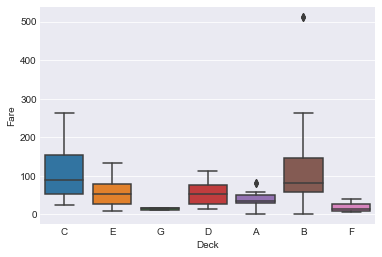

In [45]:
sns.boxplot("Deck","Fare",data=df)

In [46]:
df.loc[df["Deck"].isnull(),"Deck"] = df.loc[df["Deck"].isnull(),"Fare"].apply(fill_cabin)

In [47]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).drop("Survived")
#No longer missing deck data

Cabin          0.771581
Embarked       0.001528
Fare           0.000764
AgeCtg         0.000000
Name           0.000000
Parch          0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Deck           0.000000
Ticket         0.000000
Title          0.000000
IsNoble        0.000000
TicketPre      0.000000
TicketNum      0.000000
IsAlone        0.000000
TotalFamily    0.000000
CabinKnown     0.000000
Age            0.000000
dtype: float64

In [48]:
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

In [49]:
# med_fare = np.median(df["Fare"])
# def rich(fare):
#     if fare > med_fare:
#         return 1
#     else:
#         return 0
# df["Wealth"] = df["Fare"].apply(rich)
# df["Wealth"].value_counts()
# sns.distplot(df["Fare"])
#I tried but didnt improved to algorithm

In [50]:
def embarked(pclass):
    return mode(df[df["Pclass"] == pclass]["Embarked"])
    

In [51]:
df.loc[df["Embarked"].isnull(),"Embarked"] = df.loc[df["Embarked"].isnull(),"Pclass"].apply(embarked)

In [52]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).drop("Survived")
#No longer missing deck data

Cabin          0.771581
AgeCtg         0.000000
Embarked       0.000000
Fare           0.000000
Name           0.000000
Parch          0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Deck           0.000000
Ticket         0.000000
Title          0.000000
IsNoble        0.000000
TicketPre      0.000000
TicketNum      0.000000
IsAlone        0.000000
TotalFamily    0.000000
CabinKnown     0.000000
Age            0.000000
dtype: float64

No missing data left,Except cabin which i will drop

In [53]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [54]:
lbe = LabelEncoder()
categorical = ["Embarked","Sex","Deck","Pclass","Title","TicketPre","AgeCtg"]
for ctg in categorical:
    df[ctg] = lbe.fit_transform(df[ctg])

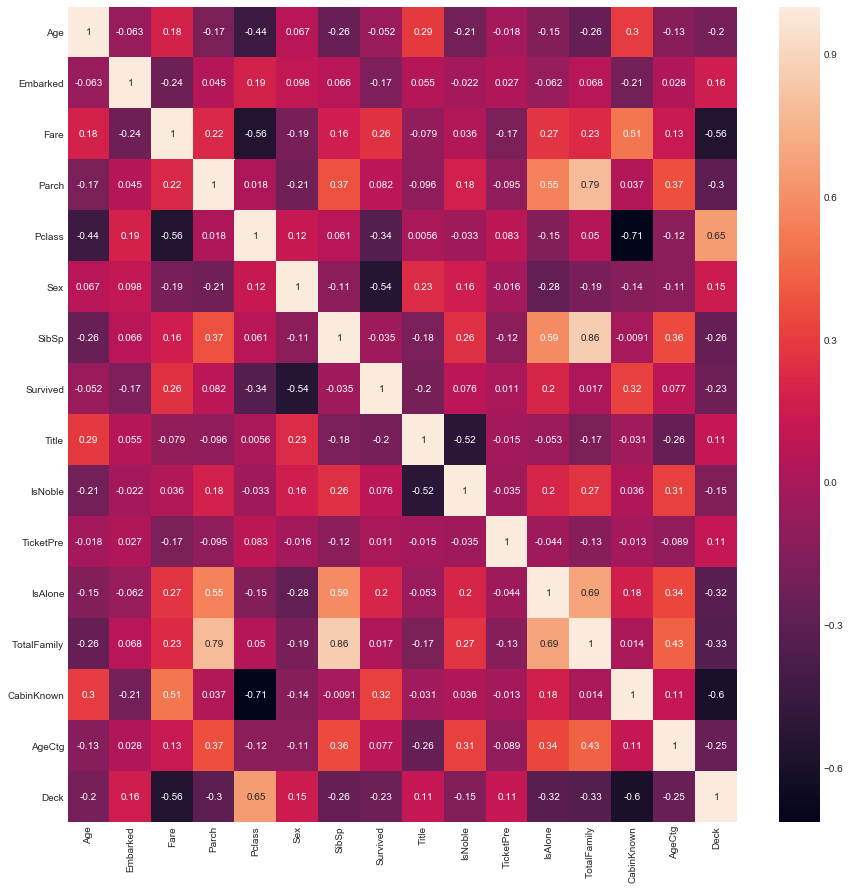

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [56]:
df.drop(df.corr()[(abs(df.corr())<0.1)["Survived"]].index, axis=1, inplace=True)

In [57]:
df.head()

,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Title,TicketNum,IsAlone,CabinKnown,Deck
PassengerId,,,,,,,,,,,,,
1,NaN,2,7.2500,"Braund, Mr. Owen Harris",2,1,0.0,A/5 21171,13,21171,1,0,7
2,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1.0,PC 17599,14,17599,1,1,3
3,NaN,2,7.9250,"Heikkinen, Miss. Laina",2,0,1.0,STON/O2. 3101282,10,3101282,0,0,7
4,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1.0,113803,14,113803,1,1,3
5,NaN,2,8.0500,"Allen, Mr. William Henry",2,1,0.0,373450,13,373450,0,0,7


In [58]:
# categorical = ["Embarked","Sex","Title","Deck","Pclass"]
# dummies = pd.get_dummies(df[categorical],drop_first=True)
# df[categorical] = df[categorical].astype(str, inplace=True)
# df = pd.concat([df.drop(categorical, axis=1), dummies],axis=1)

In [59]:
df.drop(["Name","Cabin","Ticket","TicketNum"], axis=1, inplace=True)

In [60]:
df.head()

,Embarked,Fare,Pclass,Sex,Survived,Title,IsAlone,CabinKnown,Deck
PassengerId,,,,,,,,,
1,2,7.2500,2,1,0.0,13,1,0,7
2,0,71.2833,0,0,1.0,14,1,1,3
3,2,7.9250,2,0,1.0,10,0,0,7
4,2,53.1000,0,0,1.0,14,1,1,3
5,2,8.0500,2,1,0.0,13,0,0,7


In [61]:
train = df.loc[train.index]
test = df.loc[test.index]

In [62]:
scale = StandardScaler()
skfold = StratifiedKFold(n_splits=5, random_state=42)

In [63]:
X = train.drop("Survived", axis=1)
y = train["Survived"]
test = test.drop("Survived", axis=1)

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [65]:
X_scaled = scale.fit_transform(X_train)

In [66]:
def predict(alg, X_train, y_train, X_val, y_val, X_test, name):
    alg.fit(X_train, y_train)
    predict = alg.best_estimator_.predict(scale.transform(X_test))
    valid_predict = alg.best_estimator_.predict(scale.transform(X_val))
    print(alg.best_estimator_)
    try:
        (pd.DataFrame(alg.best_estimator_.feature_importances_,index=test.columns)).plot(kind="bar")
    except:
        pass
    print("Classification report:\n ",classification_report(y_val, valid_predict))
    print("Accuracy score: ", accuracy_score(y_val, valid_predict))
    data = pd.DataFrame(predict,index=test.index,columns=["Survived"])
    data["Survived"] = data["Survived"].astype(int)
    data.to_csv(name+".csv")
    return data

In [67]:
log_param = {"C":[0.3,1,3,5],"penalty":["l1","l2"]}
log = predict(GridSearchCV(LogisticRegression(random_state=42),param_grid=log_param,cv=skfold), X_scaled, y_train, X_val, y_val, test,"logistic")

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Classification report:
               precision    recall  f1-score   support

        0.0       0.80      0.82      0.81       105
        1.0       0.74      0.72      0.73        74

avg / total       0.78      0.78      0.78       179

Accuracy score:  0.776536312849162


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
Classification report:
               precision    recall  f1-score   support

        0.0       0.84      0.86      0.85       105
        1.0       0.79      0.77      0.78        74

avg / total       0.82      0.82      0.82       179

Accuracy score:  0.8212290502793296


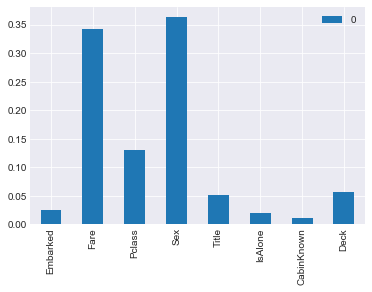

In [68]:
dtc_param = {"max_features":range(1,9)}
dtc = predict(GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=dtc_param,cv=skfold), X_scaled, y_train, X_val, y_val, test,"dtc")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Classification report:
               precision    recall  f1-score   support

        0.0       0.87      0.87      0.87       105
        1.0       0.81      0.81      0.81        74

avg / total       0.84      0.84      0.84       179

Accuracy score:  0.8435754189944135


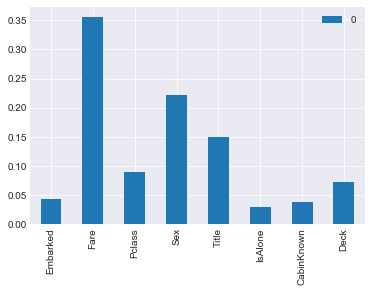

In [69]:
rfc_param = {"n_estimators":[50,100,300,600]}
rfc = predict(GridSearchCV(RandomForestClassifier(n_jobs=5, random_state=42),param_grid=rfc_param,cv=skfold), X_scaled, y_train, X_val, y_val, test,"rfc")

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)
Classification report:
               precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       105
        1.0       0.82      0.74      0.78        74

avg / total       0.83      0.83      0.83       179

Accuracy score:  0.8268156424581006


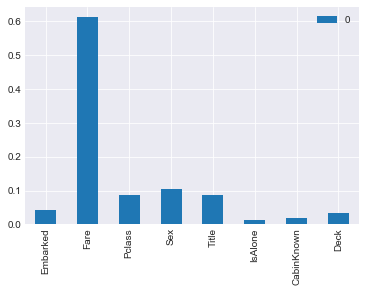

In [70]:
gbc_param = {"learning_rate":[0.03,0.1,0.3,0.9,1],"n_estimators":[500,600,800],"max_depth":range(3,6)}
gbc = predict(GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=gbc_param,cv=skfold), X_scaled, y_train, X_val, y_val, test,"gbc")

In [71]:
def predict_final(alg, X_train, y_train, X_test, name):
    alg.fit(X_train, y_train)
    predict = alg.best_estimator_.predict(scale.transform(X_test))
    data = pd.DataFrame(predict,index=test.index,columns=["Survived"])
    data["Survived"] = data["Survived"].astype(int)
    data.to_csv(name+".csv")
    return data

In [72]:
log_param = {"C":[0.3,1,3,5],"penalty":["l1","l2"]}
log = predict_final(GridSearchCV(LogisticRegression(random_state=42),param_grid=log_param,cv=skfold), X, y, test,"logistic")

In [73]:
dtc_param = {"max_features":range(1,8)}
dtc = predict_final(GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=dtc_param,cv=skfold), X, y, test,"dtc")

In [74]:
rfc_param = {"n_estimators":[50,100,300,600]}
rfc = predict_final(GridSearchCV(RandomForestClassifier(n_jobs=5, random_state=42),param_grid=rfc_param,cv=skfold), X, y, test,"rfc")

In [75]:
gbc_param = {"learning_rate":[0.03,0.1,0.3,0.9,1],"n_estimators":[500],"max_depth":range(3,6)}
gbc = predict_final(GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=gbc_param,cv=skfold), X_scaled, y_train, test,"gbc")

In [76]:
def predict_prob(alg, X_train, y_train, X_test, name):
    alg.fit(X_train, y_train)
    predict = alg.best_estimator_.predict_proba(scale.transform(X_test))
    return predict

In [77]:
log_param = {"C":[0.3,1,3,5],"penalty":["l1","l2"]}
log_prob = predict_prob(GridSearchCV(LogisticRegression(random_state=42),param_grid=log_param,cv=skfold), X_scaled, y_train, test,"logistic")

In [78]:
rfc_param = {"n_estimators":[50,100,300,600]}
rfc_prob = predict_prob(GridSearchCV(RandomForestClassifier(n_jobs=5, random_state=42),param_grid=rfc_param,cv=skfold), X_scaled, y_train, test,"rfc")

In [79]:
gbc_param = {"learning_rate":[0.03,0.1,0.3,0.9,1],"n_estimators":[500],"max_depth":range(3,6)}
gbc_prob = predict_prob(GridSearchCV(GradientBoostingClassifier(random_state=42),param_grid=gbc_param,cv=skfold), X_scaled, y_train, test,"gbc")

In [80]:
final = rfc_prob*0.3+gbc_prob*0.7

In [81]:
final = pd.DataFrame(final)

In [82]:
final["Survived"] = final[0].apply(lambda x: 0 if x >= 0.4 else 1)

In [83]:
final.set_index(test.index, inplace=True)
final.drop([0,1], inplace=True, axis=1)

In [84]:
final.to_csv("gbc+rfc.csv")

In [85]:
final["Survived"].value_counts()

0    284
1    134
Name: Survived, dtype: int64

In [86]:
rfc["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64